In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
passmark = 40

# let us assume passmark to be 40

In [3]:
df = pd.read_csv('F:/DATA SCIENCE/INTERNSHALA/STUDENT PERFORMANCE/StudentsPerformance.csv')
df.head()

# Loading file and printing first 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print (df.shape)
print ('\n',df.columns)

(1000, 8)

 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [5]:
df.describe()

# Understanding the basic information of the data, like min, max, mean and standard deviation etc.

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum().sort_values(ascending=False)

# Checking if there is any null values in data set.

writing score                  0
reading score                  0
math score                     0
test preparation course        0
lunch                          0
parental level of education    0
race/ethnicity                 0
gender                         0
dtype: int64

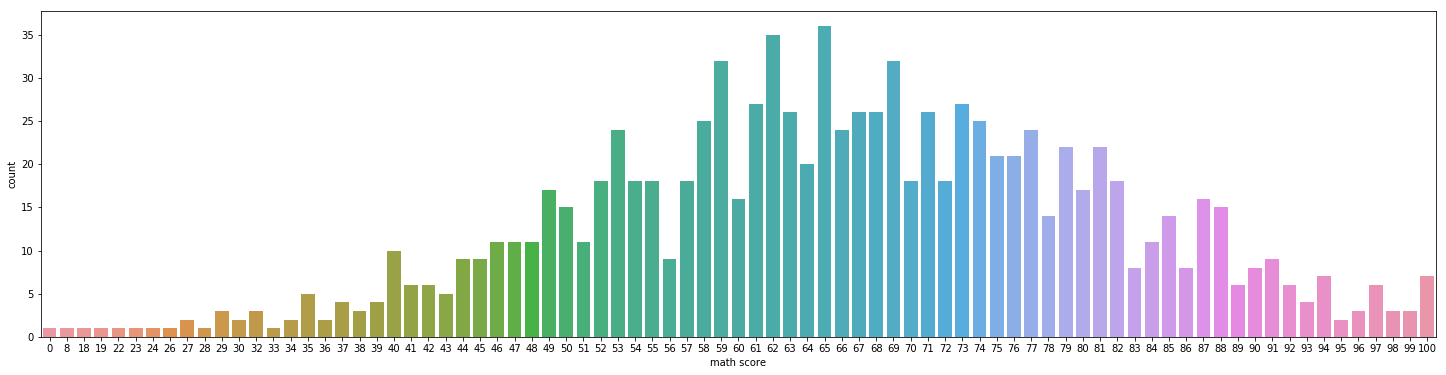

In [7]:
plt.figure(figsize=(25, 6))
sns.countplot(x='math score', data=df)


In [8]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.head()

# Creating a new column 'Math_PassStatus' who secured more than passmark

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P
4,male,group C,some college,standard,none,76,78,75,P


In [9]:
df.Math_PassStatus.value_counts()

# Number of students passed in Maths

P    960
F     40
Name: Math_PassStatus, dtype: int64

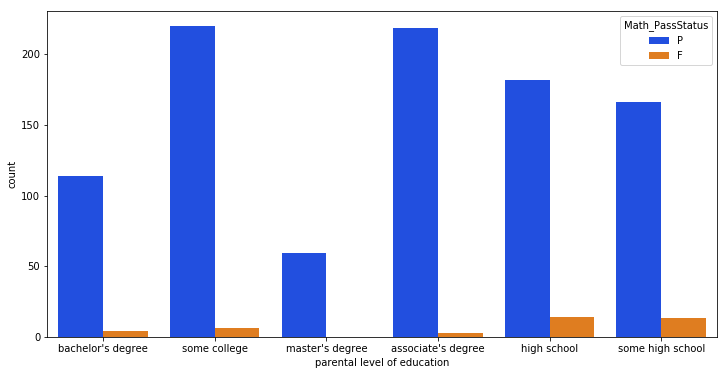

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')

# Exploring the number of pass with respect to parent's education

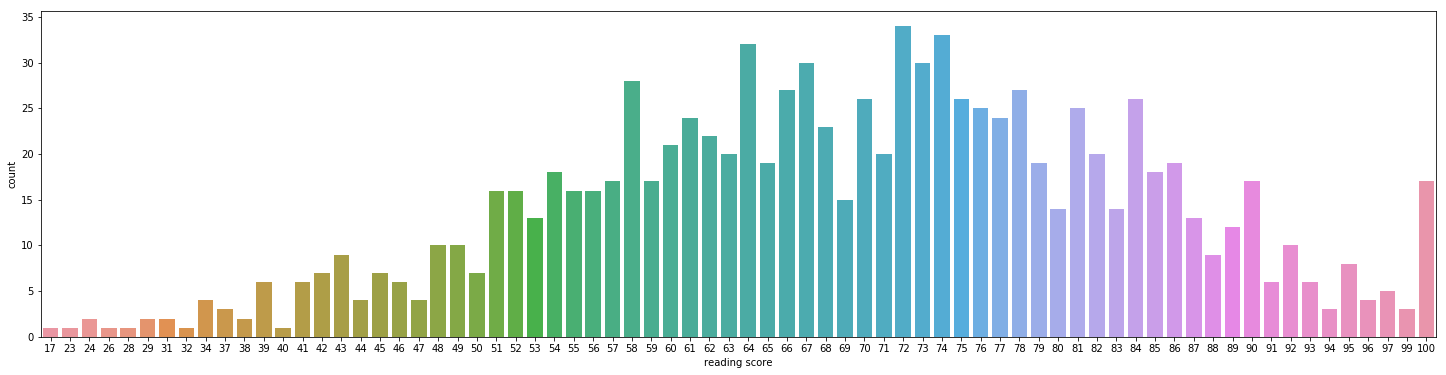

In [11]:
plt.figure(figsize=(25, 6))
sns.countplot(x="reading score", data = df)

# Let us explore the Reading score

In [12]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
# Creating a new column 'Reading_PassStatus' who secured more than passmark

df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

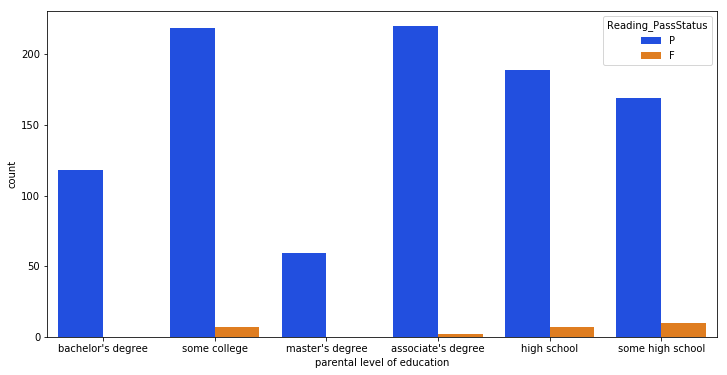

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')

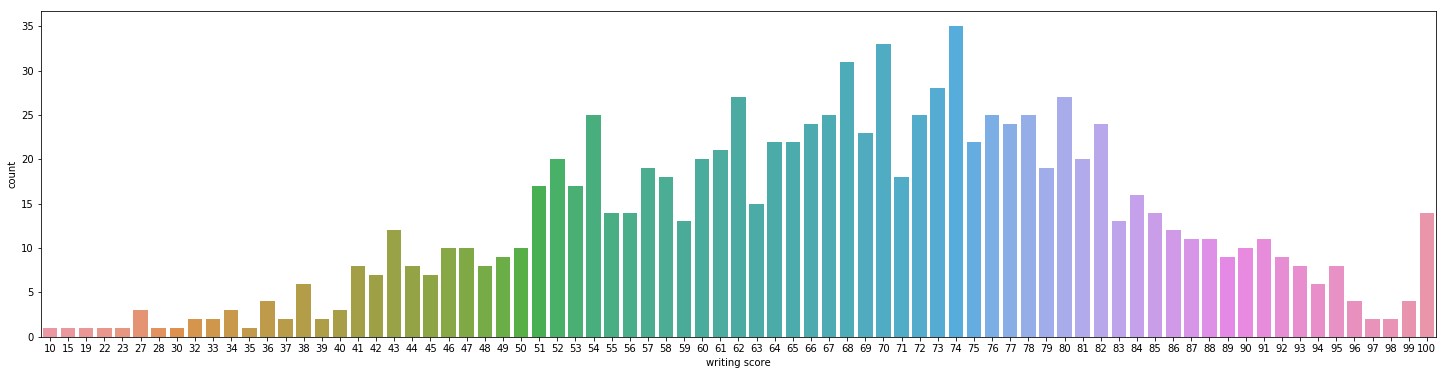

In [14]:
plt.figure(figsize=(25, 6))
sns.countplot(x="writing score", data = df)

# Let us explore the Writing score

In [15]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
# Creating a new column 'Writing_PassStatus' who secured more than passmark

df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

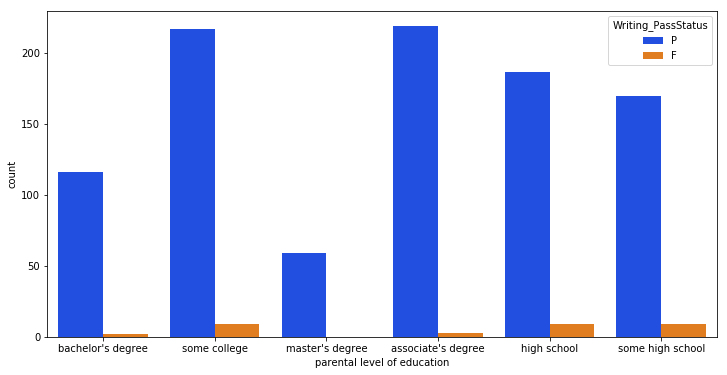

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')

In [17]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

# Let's see how many students passed in all the fields

df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

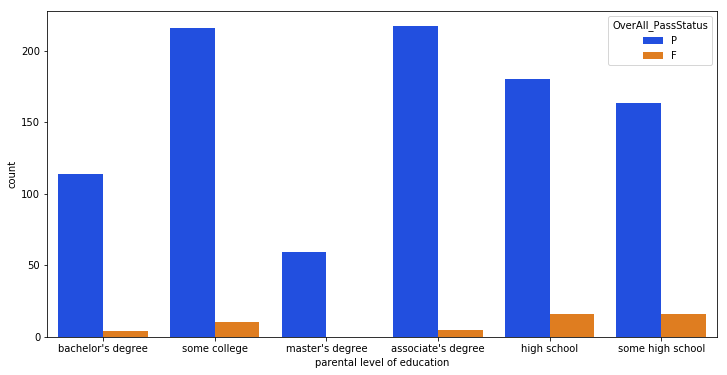

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')

In [19]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
# Creating new columns 'Total_Marks' 

df['Percentage'] = df['Total_Marks']/3
# Creating new columns 'Percentage' 

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333


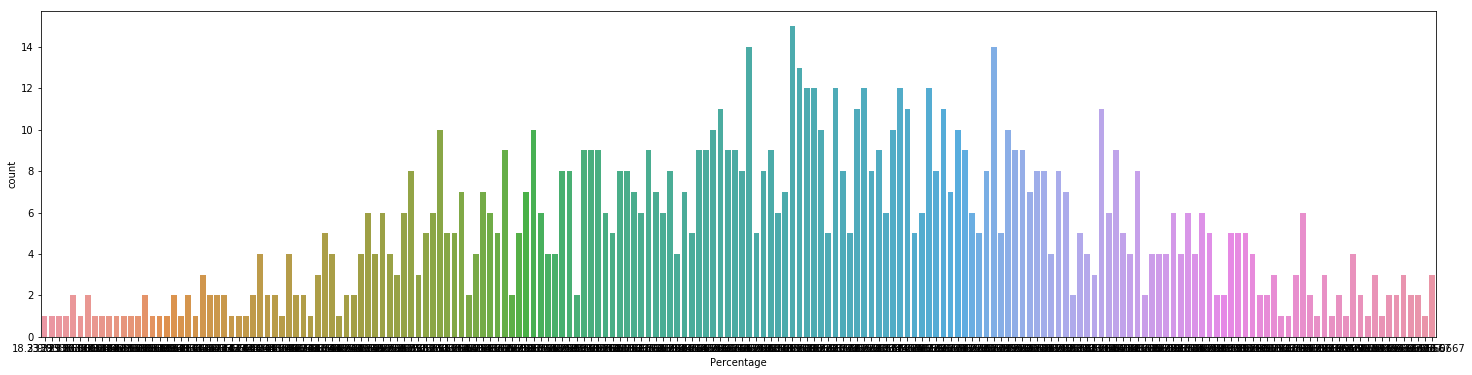

In [20]:
plt.figure(figsize=(25, 6))
sns.countplot(x="Percentage", data = df)

In [21]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'
    
# Function to retreive grade with respect to the Total_Marks obtained

In [22]:
df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333,B


In [23]:
df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

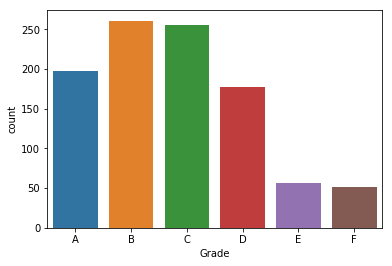

In [24]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'])

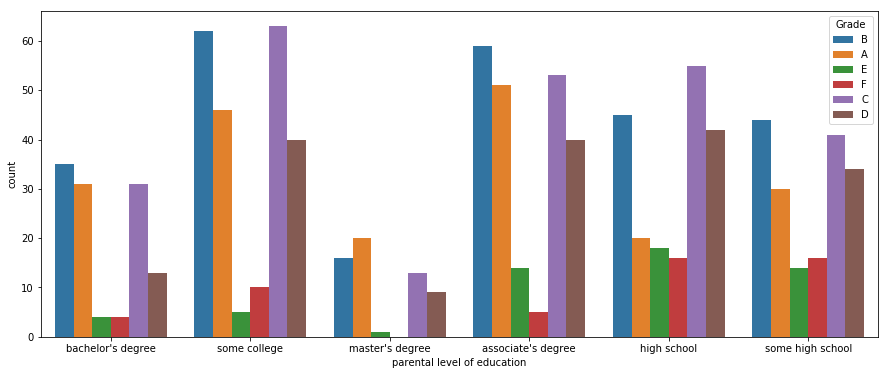

In [25]:
plt.figure(figsize=(15, 6))
sns.countplot(x='parental level of education', data = df, hue='Grade')

# Plotting the graph of grades with respects to parents education

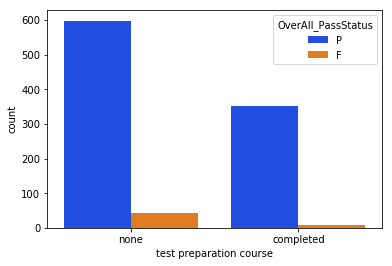

In [26]:
sns.countplot(x='test preparation course', data = df, hue='OverAll_PassStatus', palette='bright')

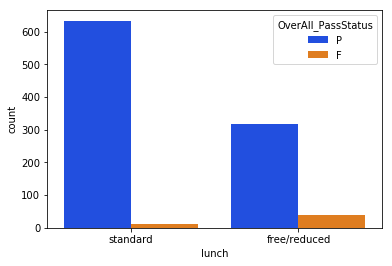

In [27]:
sns.countplot(x='lunch', data = df, hue='OverAll_PassStatus', palette='bright')

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333,B
